In [95]:
import sys
sys.path.append('../')

import numpy as np
import time
import copy
from tqdm import tqdm
import os
import numbers

import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import numpy as np
import numpy.ma as ma

from collections import OrderedDict

import torch
from torch.optim import SGD, Adam, lr_scheduler
device = 'cuda'

import importlib

import TheoryCurves
importlib.reload(TheoryCurves)

import auxFuncs
importlib.reload(auxFuncs)

import pytz
from datetime import datetime
from dateutil.relativedelta import relativedelta
tz = pytz.timezone('US/Eastern')

def time_now():
    return datetime.now(tz)

def time_diff(t_a, t_b):
    t_diff = relativedelta(t_b, t_a)  # later/end time comes first!
    return '{h}h {m}m {s}s'.format(h=t_diff.hours, m=t_diff.minutes, s=t_diff.seconds)

In [96]:
def is_number(value):
    return isinstance(value, numbers.Number)

In [97]:
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple', 'tab:orange', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']
linestyles = ['-', '--', ':', '-.']
markerstyles = ['.','*','x']

In [98]:
#Width and height of axes.
w=1
h=1

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rcParams.update({'font.size': MEDIUM_SIZE, 'figure.figsize': [w,h]})

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = SMALL_SIZE

#Helper Function for setting figure size by axis size.
#set_size(w,h,ax)
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [ ]:
# Functions to get phase transition curves.
def PTCurveH (alpha, rho, )

# Homogeneous Readouts Changing Number of Readouts
## Collapsed Phase Diagram
What's important are the effective noise to signal ratios $H = \frac{\eta^2}{s(1-c)}$, $W = \frac{\omega^2}{s(1-c)}$, $Z = \frac{\zeta^2}{s(1-c)}$. Also the sample complexity $\alpha$, and the "code-task alignment" which is in this case parameterized by $\rho$.

In [136]:
alphaLog = False
spacing = .01
lam = 0

In [137]:
if alphaLog:
    alphas = np.append(np.logspace(-2.1, 1, 300), np.inf)
else:
    alphas = np.append(np.linspace(0, 3, 301), np.inf)

In [138]:
#Preserve Parameters from compuation notebook:
#Plotting against sample complexity.
spacing = .01

ks = np.array(list(range(1, 101)) + [np.inf])
numKs = len(ks)

rhos = [0, .3, .6]
numRhos = len(rhos)

H_spacing = spacing
H_max = 2.1
H_list = np.linspace(0, H_max, int(H_max/H_spacing)+1)

W_spacing = spacing
W_max = 2.1
W_list = np.linspace(0, W_max, int(W_max/W_spacing)+1)

Z_spacing = spacing
Z_max = 2.1
Z_list = np.linspace(0, Z_max, int(Z_max/Z_spacing)+1)

#These parameters will not affect the phase diagrams
s = 1
c = .1 #As long as we have c>0 this should give the right answers.

nu_0 = 1

In [139]:
#Re-load errors and show them as ratios.
errors_H = np.load(f'errors_H_lam{lam}.npy')/s/(1-c)
errors_W = np.load(f'errors_W_lam{lam}.npy')/s/(1-c)
errors_Z = np.load(f'errors_Z_lam{lam}.npy')/s/(1-c)

In [140]:
def modified_argmin(arr, axis=None, epsilon=1e-10, alternative=-1):
    """
    Returns the index of the minimum element along the specified axis in the array.
    If all elements are approximately equal along the axis, returns the 'alternative'.

    Parameters:
    arr (numpy.ndarray): The array to find the minimum in.
    axis (int): The axis along which to find the minimum. If None, find the minimum of the flattened array.
    epsilon (float): The tolerance within which numbers are considered approximately equal.
    alternative: The value to return if all elements are approximately equal.

    Returns:
    int or alternative: Index of minimum element, or the alternative if all elements are approximately equal.
    """
    arr_range = np.ptp(arr, axis=axis)
    mask = arr_range < epsilon
    min_indices = np.argmin(arr, axis=axis)
    
    if axis is None:
        return alternative if mask else min_indices
    
    np.putmask(min_indices, mask, alternative)
    
    return min_indices

In [141]:
#Get ks ready for processing
ks_extended = np.append(ks, 0)
equal_index = len(ks_extended)-1

In [142]:
optimalKInds_H = modified_argmin(errors_H, axis = -1, alternative = equal_index)
optimalKs_H = ks_extended[optimalKInds_H]
optimalErrors_H = np.min(errors_H, axis = -1)

optimalKInds_W= modified_argmin(errors_W, axis = -1, alternative = equal_index)
optimalKs_W = ks_extended[optimalKInds_W]
optimalErrors_W = np.min(errors_W, axis = -1)

optimalKInds_Z = modified_argmin(errors_Z, axis = -1, alternative = equal_index)
optimalKs_Z = ks_extended[optimalKInds_Z]
optimalErrors_Z = np.min(errors_Z, axis = -1)

In [143]:
# Replace np.Inf values with np.nan
optimalKs_H[optimalKs_H == np.inf] = np.nan
optimalKs_W[optimalKs_W == np.inf] = np.nan
optimalKs_Z[optimalKs_Z == np.inf] = np.nan

In [144]:
def plotOptimalKDiagrams(optimalVals, rhos, alphas, lam, paramName, max_k = 100, alphaLog = False):
    
    plasma = plt.cm.plasma # define the colormap
    indexList = np.round(np.linspace(1, plasma.N, max_k-1)) #want max_k-1 colors from plasma
    plasma_list = [plasma(int(i)) for i in indexList]

    cmaplist = [(0, 0, 0, 1.0)] + [(0.5, 0.5, 0.5, 1.0)]  # Black followed by gray
    cmaplist.extend(plasma_list)
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, max_k+1)  # 2 extra colors
    # Note: Adjust the boundaries as per your data range.
    bounds = np.linspace(-.5, max_k+.5, max_k+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N + 1)  # One extra boundary

    cmaplist_cbar = [(0.5, 0.5, 0.5, 1.0)]  # gray
    cmaplist_cbar.extend(plasma_list)
    cmap_cbar = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap for error bar', cmaplist_cbar, max_k+1)  # 2 extra colors
    # Note: Adjust the boundaries as per your data range.
    bounds_cbar = np.linspace(.5, max_k+.5, max_k)
    norm_cbar = mpl.colors.BoundaryNorm(bounds_cbar, cmap.N + 1)  # One extra boundary
    ticks = np.append([1], np.arange(10, max_k+1, 10))

    
    for rhoInd, rho in enumerate(rhos):
    
        # Check if the last entry in alphas is infinity
        if alphas[-1] == np.inf:
            data_to_plot = optimalVals[rhoInd][:, :-1]  # Remove the last column
            extra_col = optimalVals[rhoInd][:, -1]  # Extract the last column
        else:
            data_to_plot = optimalVals[rhoInd]

        fig, ax = plt.subplots()

        data_to_plot_temp = np.copy(data_to_plot)
        data_to_plot_temp[data_to_plot == 0] = 1

        # Plot the main data
        im_temp = ax.matshow(data_to_plot_temp, cmap=cmap_cbar, norm=norm_cbar, aspect=data_to_plot.shape[1]/data_to_plot.shape[0])
        im = ax.matshow(data_to_plot, cmap=cmap, norm=norm, aspect=data_to_plot.shape[1]/data_to_plot.shape[0])

        if alphas[-1] == np.inf:
            ax2 = ax.inset_axes([1.1, 0, 0.1, 1])  # Add a new axis to the right with a small gap
            ax2.matshow(extra_col[:, np.newaxis], cmap=cmap, norm = norm, aspect=1/10)
            ax2.set_xticks([0])
            ax2.set_xticklabels([r'$\infty$'])
            ax2.xaxis.set_ticks_position('bottom')
            ax2.set_yticks([])
            ax2.invert_yaxis()
        
        # Create a separate figure for the colorbar
        fig_cbar = plt.figure(figsize=(w/10, 2*h))
        ax_cbar = fig_cbar.add_axes([0, 0.05, 1, 0.9])  # Define the axes for the colorbar
        cbar = mpl.colorbar.ColorbarBase(ax_cbar, cmap=cmap_cbar, boundaries=bounds_cbar, ticks=ticks, norm=norm_cbar)
        # Add this line to remove minor ticks
        cbar.ax.yaxis.set_minor_locator(mpl.ticker.NullLocator())
        # Save the colorbar to a separate SVG file
        fig_cbar.savefig('PDCBar.svg', bbox_inches='tight', dpi=300, transparent=True)

        ax.set_xlabel(r'$\alpha$')
        ax.set_ylabel(rf'${paramName}$')

        if alphaLog:
            ax.set_xticks([np.argmin(np.abs(alphas-10**p)) for p in [-2, -1, 0, 1]])
            ax.set_xticklabels([10**p for p in [-2, -1, 0, 1]])

        else:
            if alphas[-1]==np.inf:
                tickIndices = np.round(np.linspace(0, len(alphas)-2, 4))
            else:
                tickIndices = np.round(np.linspace(0, len(alphas)-1, 4))
            ax.set_xticks(tickIndices)
            ax.set_xticklabels(alphas[tickIndices.astype(int)])

        ax.set_yticks(np.linspace(0, np.argmin(np.abs(H_list-2)), 3))
        ax.set_yticklabels(np.linspace(0, 2, 3))
        ax.set_title(rf'$\rho = {rho}$, \lambda = $' + getLamString(lam))
        
        ax.xaxis.set_ticks_position('bottom')
        ax.invert_yaxis()
        
        if is_number(lam):
            ax.set_title(rf'$\rho = {rho}$, $\lambda = {lam}$')
        elif lam == 'local':
            ax.set_title(rf'$\rho = {rho}$, $\lambda = \lambda^*$')
        else:
            raise Exception('Lambda must be a number of local.')
        
        if alphaLog:
            title = f'PD_{paramName}_rho{rho}_lam{lam}_logscale.svg'
        else:
            title = f'PD_{paramName}_rho{rho}_lam{lam}.svg'
            
        fig.savefig(title, bbox_inches='tight', dpi = 300, transparent = True)

In [145]:
def plotOptimalErrDiagrams(optimalVals, rhos, alphas, lam, paramName, vmin=0, vmax=1, alphaLog = False):
    
    cmap = plt.cm.viridis
    norm = Normalize(vmin=vmin, vmax=vmax)
    
    for rhoInd, rho in enumerate(rhos):
    
        # Check if the last entry in alphas is infinity
        if alphas[-1] == np.inf:
            data_to_plot = optimalVals[rhoInd][:, :-1]  # Remove the last column
            extra_col = optimalVals[rhoInd][:, -1]  # Extract the last column
        else:
            data_to_plot = optimalVals[rhoInd]

        fig, ax = plt.subplots()

        im = ax.matshow(data_to_plot, cmap=cmap, norm = norm, aspect=data_to_plot.shape[1]/data_to_plot.shape[0])

        if alphas[-1] == np.inf:
            ax2 = ax.inset_axes([1.1, 0, 0.1, 1])  # Add a new axis to the right with a small gap
            ax2.matshow(extra_col[:, np.newaxis], cmap=cmap, norm = norm, aspect=1/10)
            ax2.set_xticks([0])
            ax2.set_xticklabels([r'$\infty$'])
            ax2.xaxis.set_ticks_position('bottom')
            ax2.set_yticks([])
            ax2.invert_yaxis()

        # Create a separate figure for the colorbar
        fig_cbar = plt.figure(figsize=(w/10, 2*h))
        ax_cbar = fig_cbar.add_axes([0, 0.05, 1, 0.9])  # Define the axes for the colorbar
        cbar = mpl.colorbar.ColorbarBase(ax_cbar, cmap=cmap, norm=norm)
        # Add this line to remove minor ticks
        cbar.ax.yaxis.set_minor_locator(mpl.ticker.NullLocator())
        # Save the colorbar to a separate SVG file
        fig_cbar.savefig('EDCBar.svg', bbox_inches='tight', dpi=300, transparent=True)


        ax.set_xlabel(r'$\alpha$')
        ax.set_ylabel(rf'${paramName}$')

        
        if alphaLog:
            ax.set_xticks(np.round([np.argmin(np.abs(alphas-10**p)) for p in [-2, -1, 0, 1]]))
            ax.set_xticklabels([10**p for p in [-2, -1, 0, 1]])

        else:
            if alphas[-1]==np.inf:
                tickIndices = np.round(np.linspace(0, len(alphas)-2, 4))
            else:
                tickIndices = np.round(np.linspace(0, len(alphas)-1, 4))
            ax.set_xticks(tickIndices.astype(int))
            ax.set_xticklabels(alphas[tickIndices.astype(int)])

        ax.set_yticks(np.linspace(0, np.argmin(np.abs(H_list-2)), 3))
        ax.set_yticklabels(np.linspace(0, 2, 3))
        
        ax.xaxis.set_ticks_position('bottom')
        ax.invert_yaxis()
        
        if is_number(lam):
            ax.set_title(rf'$\rho = {rho}$, $\lambda = {lam}$')
        elif lam == 'local':
            ax.set_title(rf'$\rho = {rho}$, $\lambda = \lambda^*$')
        else:
            raise Exception('Lambda must be a number of local.')
        
        if alphaLog:
            title = f'ED_{paramName}_rho{rho}_lam{lam}_logscale.svg'
        else:
            title = f'ED_{paramName}_rho{rho}_lam{lam}.svg'
            
        fig.savefig(title, bbox_inches='tight', dpi = 300, transparent = True)

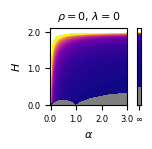

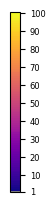

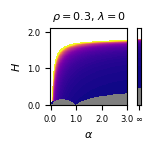

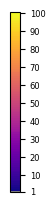

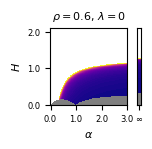

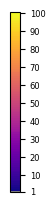

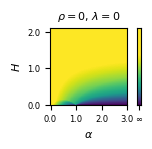

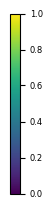

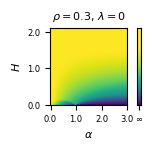

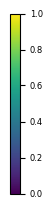

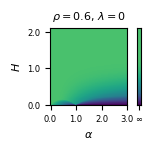

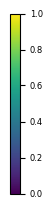

In [146]:
plotOptimalKDiagrams(optimalKs_H, rhos, alphas,lam, "H", alphaLog = alphaLog)
plotOptimalErrDiagrams(optimalErrors_H/s/(1-c), rhos, alphas, lam, "H", vmax = 1, alphaLog = alphaLog)

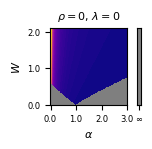

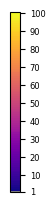

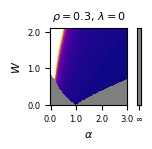

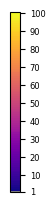

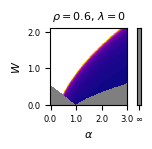

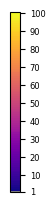

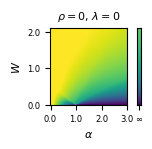

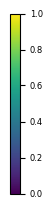

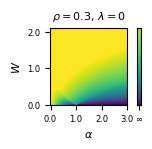

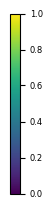

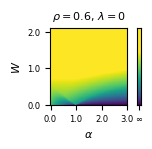

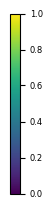

In [147]:
plotOptimalKDiagrams(optimalKs_W, rhos, alphas,lam, "W", alphaLog = alphaLog)
plotOptimalErrDiagrams(optimalErrors_W/s/(1-c), rhos, alphas, lam, "W", alphaLog = alphaLog)

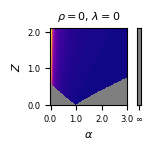

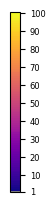

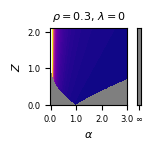

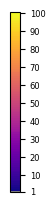

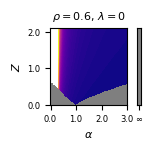

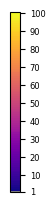

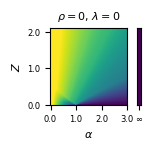

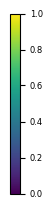

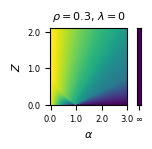

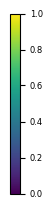

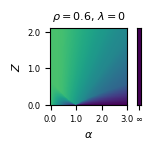

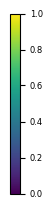

In [148]:
plotOptimalKDiagrams(optimalKs_Z, rhos, alphas,lam, "Z", alphaLog = alphaLog)
plotOptimalErrDiagrams(optimalErrors_Z/s/(1-c), rhos, alphas, lam, "Z", alphaLog = alphaLog)